<a href="https://colab.research.google.com/github/skhanduri79/Predicting-Flight-prices/blob/main/fligth_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_excel("Data_Train.xlsx")

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [9]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [12]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [13]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.4 MB


In [14]:
# data pre-process and preparation


In [15]:
data = df.copy()

In [16]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [18]:
# deriving new data from date of journey. It should be time stamp feature. we will derive, day, month, year from the date.

In [19]:
def change_into_dateTime(col):
  data[col]=pd.to_datetime(data[col])

In [20]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [21]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [22]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
  change_into_dateTime(feature)

In [23]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [24]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [25]:
data['journey_month'] = data['Date_of_Journey'].dt.month

In [26]:
data['journey_year'] = data['Date_of_Journey'].dt.year

In [27]:
# extracting minutes and hours from date time columns

In [28]:
def extract_hour_min(df,col):
  df[col+"_hour"] = df[col].dt.hour
  df[col+"minute"] = df[col].dt.minute
  return df.head(3)

In [29]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-13 05:50:00,2025-02-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-13 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [30]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-13 05:50:00,2025-02-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-13 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [33]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-13 05:50:00,2025-02-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [34]:
data.shape

(10682, 18)

In [35]:
# analysing when most flights take off

In [36]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month',
       'journey_year', 'Dep_Time_hour', 'Dep_Timeminute', 'Arrival_Time_hour',
       'Arrival_Timeminute'],
      dtype='object')

In [37]:
def flight_departure_time(x):
  if (x>4) and (x<=8):
    return "Early Morning"
  elif (x>8) and (x<=12):
    return "Morning"
  elif (x>12) and (x<=16):
    return "Noon"
  elif (x>16) and (x<=20):
    return "Evening"
  elif (x>20) and (x<=24):
    return "Night"
  else:
    return "Late Night"

<Axes: xlabel='Dep_Time_hour'>

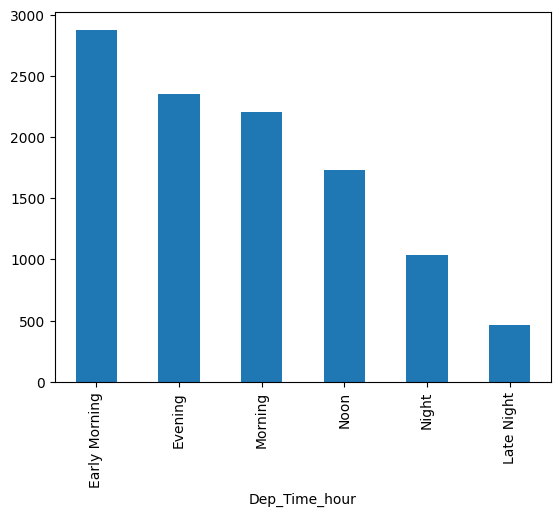

In [38]:
data["Dep_Time_hour"].apply(flight_departure_time).value_counts().plot(kind="bar")

In [39]:
!pip install plotly
!pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.2 MB/s eta 0:00:00


In [40]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs

init_notebook_mode(connected=True)
cf.go_offline()

In [41]:
data["Dep_Time_hour"].apply(flight_departure_time).value_counts().iplot(kind="bar",color = "green")

In [42]:
def preprocess_duration(x):
  if 'h' not in x:
    x = '0h' + ' ' + x
  elif 'm' not in x:
    x = x + " "+ '0m'
  return x

In [43]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [44]:
data["duration_hours"] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [45]:
data["duration_min"] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [46]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,duration_hours,duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-13 05:50:00,2025-02-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [47]:
# analysing wheather duration effects the flight prices

In [48]:
data['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


In [52]:
data['Duration_total_min']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [53]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month',
       'journey_year', 'Dep_Time_hour', 'Dep_Timeminute', 'Arrival_Time_hour',
       'Arrival_Timeminute', 'duration_hours', 'duration_min',
       'Duration_total_min'],
      dtype='object')

In [54]:
# both the features: prices and duration are continuous, we can plot a scatter plot/regression plot

<Axes: xlabel='Duration_total_min', ylabel='Price'>

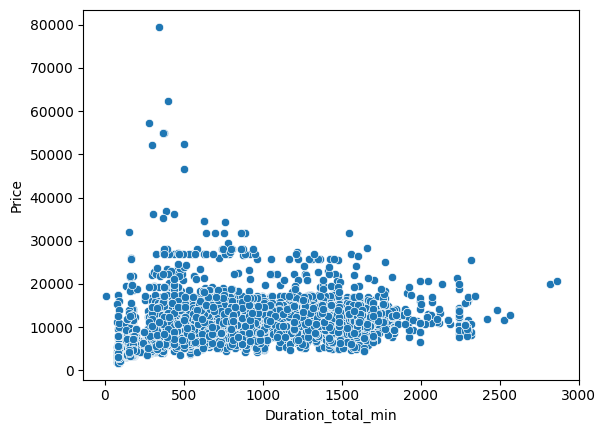

In [55]:
sns.scatterplot(x="Duration_total_min",y="Price",data=data)

<Axes: xlabel='Duration_total_min', ylabel='Price'>

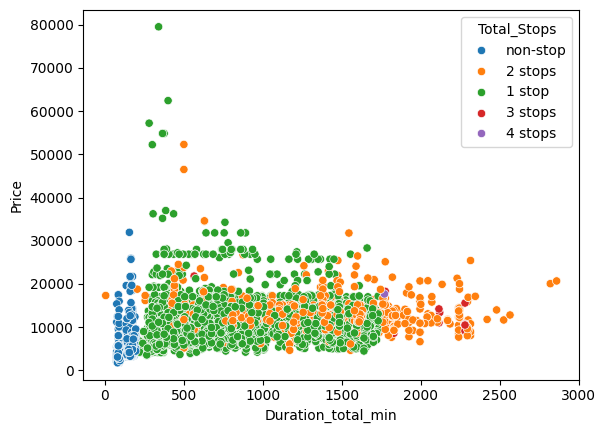

In [57]:
sns.scatterplot(x="Duration_total_min",y="Price",data=data, hue='Total_Stops')

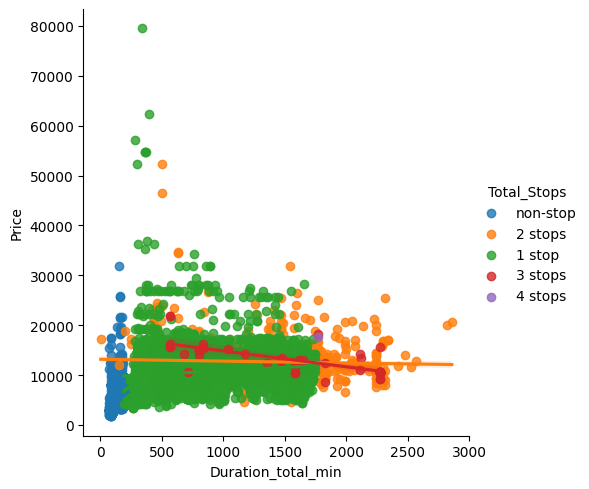

In [58]:
sns.lmplot(x="Duration_total_min",y="Price",data=data, hue='Total_Stops')

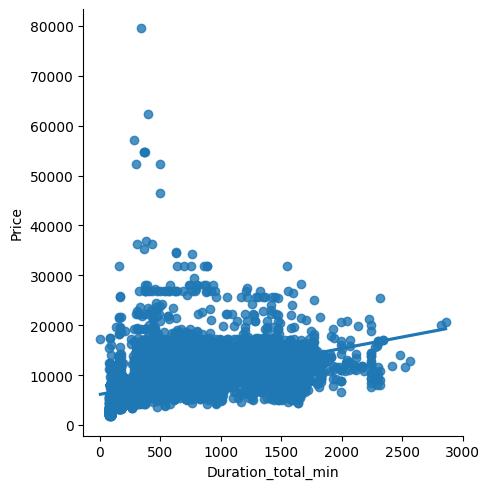

In [59]:
sns.lmplot(x="Duration_total_min",y="Price",data=data)

In [60]:
# duration increases, price increases

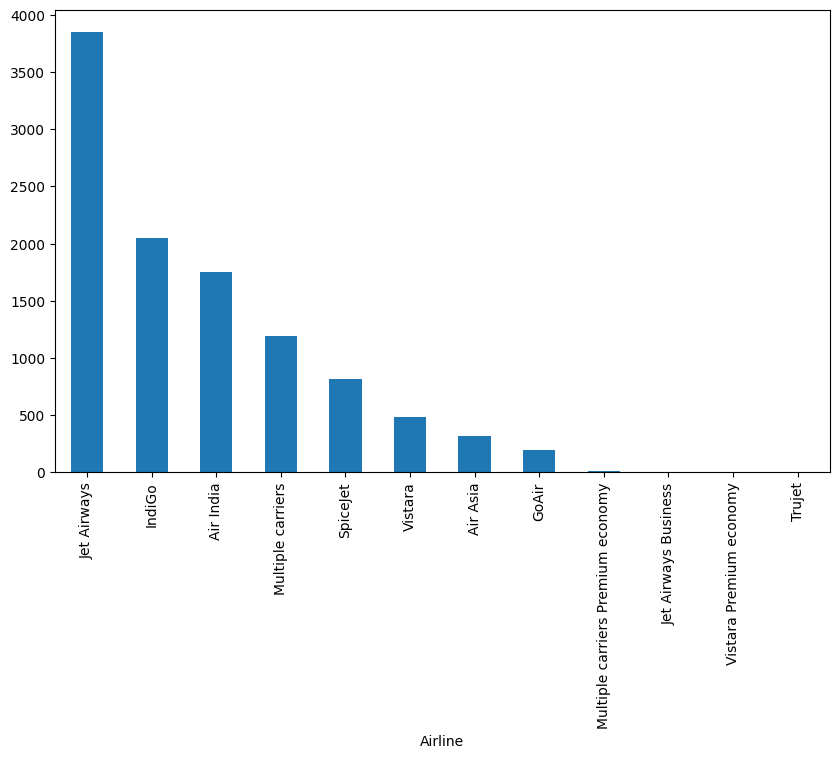

In [62]:
# mpost popular airline

plot = data['Airline'].value_counts().plot(kind='bar',figsize=(10,6))

In [63]:
# on which route is jet airways popularly used?

In [66]:
# data respect to jet airways

data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
BOM → HYD,207
DEL → JAI → BOM → COK,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


In [67]:
# for each airline, price values variation

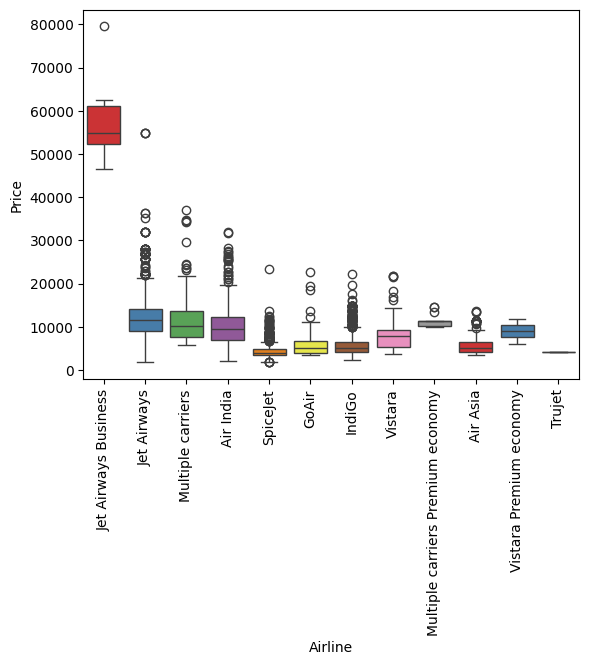

<Figure size 1500x1000 with 0 Axes>

In [76]:
sns.boxplot(x='Airline',y='Price', data=data.sort_values('Price',ascending=False),palette='Set1')
plt.xticks(rotation='vertical')
plt.figure(figsize=(15,10))
plt.show()